# Modulación en Amplitud (AM) <br>
Sistemas de Comunicación - SCT54 <br>
Instituto Tecnológico Metropolitano - ITM


In [0]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Datos 
fc = 200. # Frecuencia de la portadora
fm = 10.  # Frecuencia de la moduladora
Ec = 1.   # Amplitud de la portadora
Em = .5   # Amplitud de la moduladora

#Calculos
m = Em/Ec # Indice de modulacion
t = np.linspace(0.,.2,1000) # Vector de tiempos
vc = Ec*np.sin(2*np.pi*fc*t) # voltaje de la portadora

# Calculo de la amplitud modulada
vam = (1+m*np.sin(2*np.pi*fm*t))*vc

# Calculo de la envolvente
venp = (1+m*np.sin(2*np.pi*fm*t))*Ec
venn = -(1+m*np.sin(2*np.pi*fm*t))*Ec

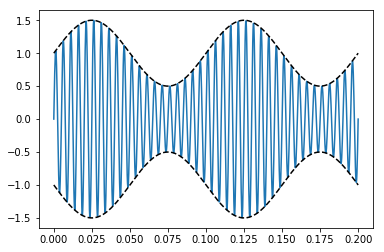

In [3]:
#Graficas de la modulacion y la envolvente
plt.plot(t,vam)
plt.plot(t,venp,'k--')
plt.plot(t,venn,'k--')